
## Volume 2: OpenGym



Bryant McArthur
Sec 002
3/3/22





**Note:** Some IPython notebook platforms (such as Google Colab) do not currently support rendering OpenAI environments. In order to properly render the OpenGym environments in this lab, you may need to run the Jupyter Notebook locally (for example, run it in VSCode or from the command line).

In [3]:
pip install gym

Note: you may need to restart the kernel to use updated packages.


In [4]:
import gym
import numpy as np
from IPython.display import clear_output
import random
from matplotlib import pyplot as plt

**Problem 1**

*   Implement `random_blackjack()`.
*   Run the game 500 times and output the percentage of games that are wins.



In [5]:
# Problem 1
def random_blackjack(n):
    """
    Play a random game of Blackjack. Determine the
    percentage the player wins out of n times.
    Parameters:
        n (int): number of iterations
    Returns:
        percent (float): percentage that the player
                         wins
    """
    
    player = 0
    #Do this n times
    for i in range(n):
        env = gym.make('Blackjack-v1')
        env.reset()
        
        terminate = False
        while terminate == False:
            turn = env.step(env.action_space.sample())  #Take random action always
            if turn[2] == True:
                terminate = True
                
            
            if turn[1] == 1.0:
                player += 1
    
    #calculate win ratio
    winratio = player/n
    
    env.close()
    
    return winratio
    

In [6]:
print(random_blackjack(500))

0.284


**Problem 2**

* Implement `blackjack()`.
* For `n` = 1, 2, ..., 21, plot the win percentage after 10,000 games of Blackjack.
* Identify which value of `n` gives the highest win rate.

In [9]:
# Problem 2
def blackjack(n=11):
    """
    Play blackjack with naive algorithm.
    Parameters:
        n (int): maximum accepted player hand
    Return:
        percent (float): percentage of 10,000 iterations
                         that the player wins
    """
    player = 0
    #for i in range(10000)
    for i in range(10000):
        env = gym.make('Blackjack-v1')
        env.reset()
        cardsum = 0
        while cardsum <= n:
            turn = env.step(1) #Draw a card
            #print(turn[0][0])
            cardsum = turn[0][0]
        
        turn =env.step(0) #Stop drawing cards
            
        if turn[1] == 1.0:
                player += 1  #Count my wins
                
        env.close()
                
    #calculate my win ratio
    winratio = player/10000
                
    return winratio
                
        

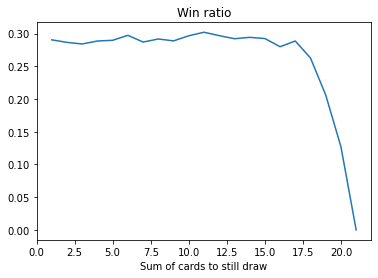

In [10]:
wins = []
for i in range(1,22):
    x = blackjack(i)
    wins.append(x)

#PLOT EVERYTHING
plt.plot(range(1,22),wins)
plt.title("Win ratio")
plt.xlabel("Sum of cards to still draw")
plt.show()

*Identify which value(s) give the highest winrate here:*
18 and below gives the best win ratio.

**Problem 3**

* Implement `cartpole()`.
* Render the game and run your function once.
* Run Cartpole 100 times (without rendering) and print out the average number of steps before it terminates.

In [118]:
# Problem 3
def cartpole(render=False):
    """
    Solve CartPole-v0 by checking the velocity
    of the tip of the pole.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    
    env = gym.make('CartPole-v1')
    i = 0
    try:
        env.reset()
        obs, reward, done, info = env.step(env.action_space.sample()) # take a random action
        done = False
        while not done:
            i += 1
            if render:
                env.render()
            #Depending on the angle push it left or right
            if obs[3] < 0:
                obs, reward, done, info = env.step(0)
            elif obs[3] > 0:
                obs, reward, done, info = env.step(1)
            
    finally:
        env.close()
    
    return i
    

In [119]:
cartpole(True)

318

In [122]:
iterations = 0
for i in range(100):
    iterations += cartpole()
    
print(iterations/100)

200.54


**Problem 4**

* Implement `car()`.
* Render the game and run your function once.
* Run MountainCar 100 times (without rendering) and print out the average number of steps before it terminates.

In [19]:
# Problem 4
def car(render=False):
    """
    Solve MountainCar-v0 by checking the position
    of the car.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    env = gym.make('MountainCar-v0')
    i = 0
    try:
        env.reset()
        obs, reward, done, info = env.step(2) # take a random action
        done = False
        while not done:
            if render:
                env.render()
            i += 1
            #If the velocity is positive push it right
            if obs[1] > 0:
                obs, reward, done, info = env.step(2)
            #If the velocity is negative push it left
            elif obs[1] < 0:
                obs, reward, done, info = env.step(0)
            #If velocity is zero then just push it whichever direction you want.
            else:
                obs, reward, done, info = env.step(2)
            
    finally:
        env.close()
    
    return i

In [20]:
car(True)

114

In [21]:
iterations = 0
for i in range(100):
    iterations += car()
    
print(iterations/100)

118.19


**Helper Function for Problem 5**

In [29]:
def find_qvalues(env,alpha=.1,gamma=.6,epsilon=.1):
    """
    Use the Q-learning algorithm to find qvalues.
    Parameters:
        env (str): environment name
        alpha (float): learning rate
        gamma (float): discount factor
        epsilon (float): maximum value
    Returns:
        q_table (ndarray nxm)
    """
    # Make environment
    env = gym.make(env)
    # Make Q-table
    q_table = np.zeros((env.observation_space.n,env.action_space.n))

    # Train
    for i in range(1,100001):
        # Reset state
        state = env.reset()

        epochs, penalties, reward, = 0,0,0
        done = False

        while not done:
            # Accept based on alpha
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            next_state, reward, done, info = env.step(action)

            # Calculate new qvalue
            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            # Check if penalty is made
            if reward == -10:
                penalties += 1

            # Get next observation
            state = next_state
            epochs += 1

        # Print episode number
        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.")
    return q_table


**Problem 5**

* Render the "`Taxi-v3`" environment, act randomly until it terminates, and calculate the total reward
* Render the "`Taxi-v3`" environment, use the Q-table to act optimally until it terminates, and calculate the total reward
* Implement `taxi()`, then use it to print the average total reward for each algorithm.


In [30]:
# Random actions Taxi game
env = gym.make('Taxi-v3')
try:
    env.reset()
    obs, reward, done, info = env.step(env.action_space.sample()) # take a random action
    done = False
    while not done:
        obs, reward2, done, info = env.step(env.action_space.sample()) # take a random action
        reward += reward2
finally:
    env.close()
    
print(reward)  


-776


In [32]:
# Q-table actions Taxi game
env = 'Taxi-v3'
q_table = find_qvalues(env)

Episode: 100000
Training finished.


In [47]:
def taxi(q_table):
    """
    Compare naive and q-learning algorithms.
    Parameters:
        q_table (ndarray nxm): table of qvalues
    Returns:
        naive (float): mean reward of naive algorithm
                       of 10000 runs
        q_reward (float): mean reward of Q-learning algorithm
                          of 10000 runs
    """
    env = gym.make('Taxi-v3')
    try:
        env.reset()
        obs, reward, done, info = env.step(env.action_space.sample()) # take a random action
        done = False
        while not done:
            #env.render()
            obs, reward1, done, info = env.step(env.action_space.sample()) # take a random action
            reward += reward1
    finally:
        env.close()
    reward1 = reward
    reward = 0
    reward2 = 0
    
    try:
        obs = env.reset()
        done = False
        while not done:
            action = np.argmax(q_table[obs,:]) #Build the q-table based on the observation
            obs, reward, done, info = env.step(action) #Take the optimal action based on the Q-table
            reward2 += reward
    finally:
        env.close()
        
    return reward1, reward2

In [48]:
# Print the average rewards of the Taxi game for both algorithms run 10,000 times
taxi(q_table)

(-866, 7)